<a href="https://colab.research.google.com/github/SohamJoshi25/periapicalLesionClassifier/blob/main/Dental_with_more_dense_Layers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/ImagesUFPE.zip", 'r')
zip_ref.extractall("/content/Images")
zip_ref.close()

In [5]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/Database.csv')

# Define the directory where your images are currently stored
image_dir = '/content/Images/Coronal'

# Split the dataset into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['type'], random_state=42)

# Create directories for each category and subdirectories for train/test
for category in df['type'].unique():
    os.makedirs(f'train/{category}', exist_ok=True)
    os.makedirs(f'test/{category}', exist_ok=True)

# Function to move images to their respective folders (train/test)
def move_image(image_name, category, set_type):
    image_name = str(image_name)+".png"
    src = os.path.join(image_dir,  image_name)
    print(src)  # Source image path
    dest_folder = os.path.join(set_type, f'{category}')  # Destination folder (train/test/category_X)
    dest = os.path.join(dest_folder,  image_name)  # Destination image path

    if os.path.exists(src):
        shutil.move(src, dest)  # Move the image
    else:
        print(f"Image {image_name} not found!")

# Move train images
train_df.apply(lambda row: move_image(row['file'], row['type'], 'train'), axis=1)

# Move test images
test_df.apply(lambda row: move_image(row['file'], row['type'], 'test'), axis=1)


/content/Images/Coronal/254.png
/content/Images/Coronal/878.png
/content/Images/Coronal/513.png
/content/Images/Coronal/466.png
/content/Images/Coronal/704.png
/content/Images/Coronal/440.png
/content/Images/Coronal/636.png
/content/Images/Coronal/191.png
/content/Images/Coronal/110.png
/content/Images/Coronal/193.png
/content/Images/Coronal/292.png
/content/Images/Coronal/323.png
/content/Images/Coronal/387.png
/content/Images/Coronal/882.png
/content/Images/Coronal/231.png
/content/Images/Coronal/999.png
/content/Images/Coronal/453.png
/content/Images/Coronal/843.png
/content/Images/Coronal/977.png
/content/Images/Coronal/622.png
/content/Images/Coronal/947.png
/content/Images/Coronal/321.png
/content/Images/Coronal/222.png
/content/Images/Coronal/859.png
/content/Images/Coronal/974.png
/content/Images/Coronal/869.png
/content/Images/Coronal/408.png
/content/Images/Coronal/748.png
/content/Images/Coronal/261.png
/content/Images/Coronal/785.png
/content/Images/Coronal/107.png
/content

,0
328,None
487,None
685,None
827,None
174,None
...,...
44,None
469,None
303,None
981,None


In [6]:
from tensorflow import keras
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout,Input
from keras.applications import ResNet50, VGG16

In [7]:
input_shape = (115, 186, 3)

base_conv_model_resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(115, 186, 3))
base_conv_model_vgg = VGG16(weights='imagenet', include_top=False,input_shape=(115, 186, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
base_conv_model_resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 115, 186, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 121, 192, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 58, 93, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 58, 93, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 58, 93, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 60, 95, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 29, 47, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 29, 47, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 29, 47, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 29, 47, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 29, 47, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 29, 47, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 29, 47, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 29, 47, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 29, 47, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [43]:
model = Sequential()
model.add(base_conv_model_resnet)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())  # Adding Batch Normalization
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())  # Adding Batch Normalization
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [44]:
base_conv_model_resnet.trainable = False

In [45]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(115,186)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(115,186)
)

Found 800 files belonging to 3 classes.
Found 200 files belonging to 3 classes.


In [46]:
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)


In [47]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 4, 6, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      12,583,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,738,379 (235.51 MB)

 Trainable params: 12,716,547 (48.51 MB)

 Non-trainable params: 23,588,736 (89.98 MB)

 Optimizer params: 25,433,096 (97.02 MB)

In [49]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 154s 4s/step - accuracy: 0.3812 - loss: 1.3806 - val_accuracy: 0.4500 - val_loss: 2.3648
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 101s 4s/step - accuracy: 0.4729 - loss: 1.1133 - val_accuracy: 0.4500 - val_loss: 1.6511
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.5260 - loss: 0.9672 - val_accuracy: 0.4500 - val_loss: 1.8636
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.5992 - loss: 0.9097 - val_accuracy: 0.4200 - val_loss: 1.6899
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.6221 - loss: 0.8591 - val_accuracy: 0.2700 - val_loss: 3.2881
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 98s 4s/step - accuracy: 0.7089 - loss: 0.7024 - val_accuracy: 0.3900 - val_loss: 1.6868
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 94s 4s/step - accuracy: 0.7379 - loss: 0.6584 - val_accuracy: 0.4000 - val_loss: 1.3045
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.7501 - loss: 0.5773 - val_accuracy: 0.2900 - val_l

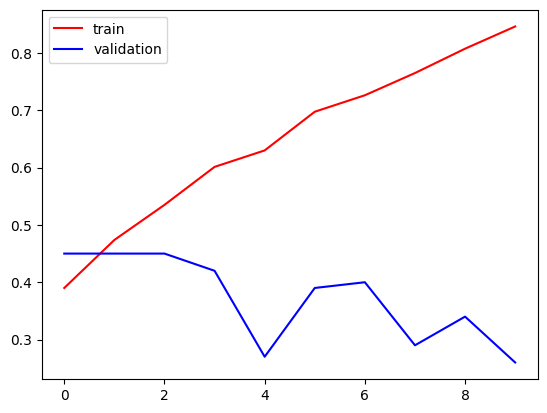

In [51]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

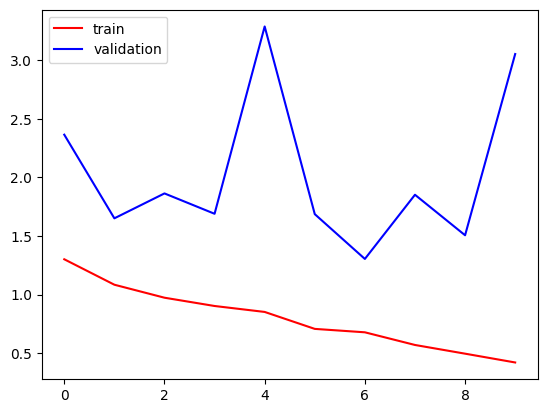

In [52]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()